<h1>SCVx Astrobee (official_template)</h1>

This template does not take in account time dilation.

Guidance problem to solve:

$$
\begin{align*}
    \text{min} \quad &\int_{0}^{t_f}||\bm{\tau}(t)||_2^2dt+\int_0^{t_f}||\bm{a}(t)||_2^2dt\\
    \text{s.t.}\quad&
        \dot{\bm{r}}=
        \bm{v}\\
        &\dot{\bm{v}}=
        \frac{1}{m}\bm{F}=\bm{a}\\
        &\dot{\bm{q}}=
        \frac{1}{2}\begin{bmatrix}
        0&-\omega_x&-\omega_y&-\omega_z\\
        \omega_x&0&\omega_z&-\omega_y\\
        \omega_y&-\omega_z&0&\omega_x\\
        \omega_z&\omega_y&-\omega_x&0
        \end{bmatrix}\bm{q}\\
        &\dot{\bm{\omega}}=
        \bm{I}^{-1}(-\bm{\omega}\times\bm{I}\bm{\omega}+\bm{\tau})\\
    &||\bm{r}-\bm{c}_1||\geq d_1,\quad||\bm{r}-\bm{c}_2||\geq d_2,\quad||\bm{r}-\bm{c}_3||\geq d_3\\
    &||\bm{v}||_2\leq v_{\text{max}}\\
    &||\bm{\omega}||_2\leq \omega_{\text{max}}\\
    &||\bm{a}||_1\leq a_{\text{max}}\\
    &||\bm{\tau}||_1\leq\tau_{\text{max}}\\
    &\bm{x}(0)=\bm{x}_0,\quad\bm{x}(t_f)=\bm{x}_{t_f}\\
    &\bm{v}(0)=\bm{v}_0,\quad\bm{v}(t_f)=\bm{v}_{t_f}\\
    &\bm{q}(0)=\bm{q}_0,\quad\bm{q}(t_f)=\bm{q}_{t_f}\\
    &\bm{w}(0)=\bm{w}_0,\quad\bm{\omega}(t_f)=\bm{\omega}_{t_f}
\end{align*}
$$


Given the scaling matrices and vectors $\bm{S}_x$, $\bm{S}_u$, $\bm{c}_x$, $\bm{c}_u$:

$$\hat{\bm{u}}=\begin{bmatrix}
\bm{a}\\
\bm{\tau}
\end{bmatrix},\quad\hat{\bm{u}}=\bm{S}_u\bm{u}+\bm{c}_u$$

$$\hat{\bm{x}}=\begin{bmatrix}
\bm{r}\\
\bm{v}\\
\bm{q}\\
\bm{\omega}
\end{bmatrix},\quad\hat{\bm{x}}=\bm{S}_x\bm{x}+\bm{c}_x$$

Where scaling matrices and vectors try to limit the optimization variables within $\bm{x}\in[0, 1]^n$, $\bm{u}\in[0, 1]^m$.

First, the original optimization is modeled as follows:
$$
\begin{align*}
    \text{min} \quad &J_\lambda(\bm{x},\bm{u},\bm{v}_c,\bm{v}_i)\\
    \text{s.t.}\quad&
        \dot{\hat{\bm{x}}}=
        \bm{f}(\hat{\bm{x}},\hat{\bm{u}})\\
    &\bm{g}(\hat{\bm{x}},\hat{\bm{u}})\leq \bm{0}\\
    &||\bm{x}-\bar{\bm{x}}||_\infty+||\bm{u}-\bar{\bm{u}}||_\infty\leq \eta\\
    &\hat{\bm{x}}\in\mathcal{X},\quad \hat{\bm{u}}\in\mathcal{U}
\end{align*}
$$
Where $\mathcal{X}$, $\mathcal{U}$ encompass convex restrictions.

Then, original optimization problem is transformed into (for instance, via 1st order Taylor's series):

$$
\begin{align*}
    \text{min} \quad &J_\lambda(\bm{x},\bm{u},\bm{v}_c,\bm{v}_i)\\
    \text{s.t.}\quad&
        \dot{\hat{\bm{x}}}=
        \hat{\bm{A}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\hat{\bm{x}}+\hat{\bm{B}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\hat{\bm{u}}+\hat{\bm{y}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})+\bm{v}_c\\
    &\hat{\bm{C}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\hat{\bm{x}}+\hat{\bm{D}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\hat{\bm{u}}+\hat{\bm{z}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\leq \bm{v}_i\\
    &||\bm{x}-\bar{\bm{x}}||_\infty+||\bm{u}-\bar{\bm{u}}||_\infty\leq \eta\\
    &\hat{\bm{x}}\in\mathcal{X},\quad \hat{\bm{u}}\in\mathcal{U}
\end{align*}
$$

Defining:

$$
\begin{equation*}
\bm{A}=\bm{S}_x^{-1}\hat{\bm{A}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\bm{S}_x,\quad \bm{B}=\bm{S}_x^{-1}\hat{\bm{B}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\bm{S}_u
\end{equation*}
$$
$$
\begin{equation*}
\bm{y}=\bm{S}_x^{-1}\hat{\bm{A}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\bm{c}_x+
\bm{S}_x^{-1}\hat{\bm{B}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})\bm{c}_u+
\bm{S}_x^{-1}\hat{\bm{y}}(\hat{\bar{\bm{x}}},\hat{\bar{\bm{u}}})
\end{equation*}
$$

Some matrix algebra leads to the following optimization problem:
$$
\begin{align*}
    \text{min} \quad &J_\lambda(\bm{x},\bm{u},\bm{v}_c,\bm{v}_i)\\
    \text{s.t.}\quad&
        \dot{\bm{x}}=
        \bm{A}\bm{x}+\bm{B}\bm{u}+\bm{y}+\bm{v}_c\\
    &\bm{C}\bm{x}+\bm{D}\bm{u}+\bm{z}\leq \bm{v}_i\\
    &||\bm{x}-\bar{\bm{x}}||_\infty+||\bm{u}-\bar{\bm{u}}||_\infty\leq \eta\\
    &\bm{x}\in\mathcal{X},\quad \bm{u}\in\mathcal{U}
\end{align*}
$$

Then, through discretization techniques, we need to generate:

$$
\begin{align*}
    \text{min} \quad &\mathcal{L}_\lambda(\bm{x},\bm{u},\bm{v}_c,\bm{v}_i)\\
    \text{s.t.}\quad&
        \bm{x}_{k+1}=
        \bm{A}_k\bm{x}+\bm{B}_k\bm{u}_k+\bm{y}_k+\bm{v}_{c_k}\\
    &\bm{C}_{k}\bm{x}_{k}+\bm{D}_{k}\bm{u}_{k}+\bm{z}_{k}\leq \bm{v}_{i_k}\\
    &||\bm{x}_{k}-\bar{\bm{x}}_{k}||_1+||\bm{u}_{k}-\bar{\bm{u}}_{k}||_1\leq \eta\\
    &\bm{x}_k\in\mathcal{X}_k,\quad \bm{u}_k\in\mathcal{U}_k
\end{align*}
$$

This example denotes for instance:
- $\hat{\bm{x}}$ as `x_no_discrete_no_scaled`.
- $\bm{x}$ as `x_no_discrete_scaled`
- $\bm{x}_k$ as `x_discrete_scaled`
- $\bar{\bm{x}}_k$ as `ox_discrete_scaled` (last generated trajectory)

Libraries:

In [3]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R, Slerp
import time
import ecos
import math
import sympy as sp

Input parameters:

In [4]:
T = 51-1 # 101-1 means 101 discretization points
tf = 200.0
tau_double = tf/(T)
size_N=20 #discretization accuracy
print("Step: ",tau_double," [s]")

start_r_xyz=np.array([[0.0],[-1.0],[1.2]])
end_r_xyz=np.array([[5.0],[2.0],[2.2]])

start_v_xyz=np.array([[0.0],[-0.2],[0.0]])
end_v_xyz=np.array([[0.1],[0.0],[0.3]])

start_quat=np.array([[0],[1],[0],[0]])
end_quat=np.array([[0],[0],[1],[0]])

start_w_xyz=np.array([[0.0],[0.0],[0.0]])
end_w_xyz=np.array([[0.0],[0.0],[0.0]])

start_pos_double=np.block([[start_r_xyz],[start_v_xyz],[start_quat],[start_w_xyz]])
end_pos_double=np.block([[end_r_xyz],[end_v_xyz],[end_quat],[end_w_xyz]])

c_obs1_double = np.array([[1.1],[-0.5],[1]]) #m
c_obs2_double = np.array([[2.6],[0.5],[1.1]]) #m
c_obs3_double = np.array([[4],[1.6],[1.2]]) #m

d_obs1_double = 0.8 #m
d_obs2_double = 0.8 #m
d_obs3_double = 0.8 #m

J1_double=0.1083 #Kg m^2
J2_double=0.1083 #Kg m^2
J3_double=0.1083 #Kg m^2

acc_max_double = 20/7.2*0.001 #m/s^2
torq_max_double = 100*0.000001 #Kg m^2/s^2

vel_max_double = 0.4 #m/s
omega_max_double = 5.0*np.pi/180 #rad/s


#Guidance parameters (COGU parameters)
rho0=0.0
rho1=0.1
rho2=0.7
etta0=0.001
etta1=10
beta_sh=2
beta_gr=2

lamb_double=1000
etta_double=1

e_tol=0.05
epsilon_stop_norm=0.04

#scaling matrices and vectors
S_u_scaling_double=np.array([[2*acc_max_double,0,0,0,0,0],
                      [0,2*acc_max_double,0,0,0,0],
                      [0,0,2*acc_max_double,0,0,0],
                      [0,0,0,2*torq_max_double,0,0],
                      [0,0,0,0,2*torq_max_double,0],
                      [0,0,0,0,0,2*torq_max_double],])
c_u_scaling_double=np.array([[-acc_max_double],
                      [-acc_max_double],
                      [-acc_max_double],
                      [-torq_max_double],
                      [-torq_max_double],
                      [-torq_max_double]])

S_x_scaling_double=np.array([[2*30,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,2*30,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,2*30,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,2*vel_max_double,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,2*vel_max_double,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,2*vel_max_double,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,2*1,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,2*1,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,2*1,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,2*1,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,omega_max_double,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,omega_max_double,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,omega_max_double]])
c_x_scaling_double=np.array([[-30],
                      [-30],
                      [-30],
                      [-vel_max_double],
                      [-vel_max_double],
                      [-vel_max_double],
                      [-1],
                      [-1],
                      [-1],
                      [-1],
                      [-omega_max_double],
                      [-omega_max_double],
                      [-omega_max_double]])

states_size = 13
inputs_size = 6
non_convex_inequalities_size = 3

Step:  4.0  [s]


In [24]:
ax, ay, az = sp.symbols('ax ay az')
taux, tauy, tauz = sp.symbols('taux tauy tauz')

rx, ry, rz = sp.symbols('rx ry rz')
vx, vy, vz = sp.symbols('vx vy vz')

wx, wy, wz = sp.symbols('wx wy wz')
q0, q1, q2, q3 = sp.symbols('q0 q1 q2 q3')

Ixx, Iyy, Izz = sp.symbols('Ixx Iyy Izz')
Ixy, Ixz, Iyz = sp.symbols('Ixy Ixz Iyz')

d_obs1, d_obs2, d_obs3 = sp.symbols('d_obs1 d_obs2 d_obs3')
c_obs1_x, c_obs1_y, c_obs1_z = sp.symbols('c_obs1_x c_obs1_y c_obs1_z')
c_obs2_x, c_obs2_y, c_obs2_z = sp.symbols('c_obs2_x c_obs2_y c_obs2_z')
c_obs3_x, c_obs3_y, c_obs3_z = sp.symbols('c_obs3_x c_obs3_y c_obs3_z')

# Rigid body kinematics
I = sp.Matrix([
    [Ixx, Ixy, Ixz],
    [Ixy, Iyy, Iyz],
    [Ixz, Iyz, Izz]
])

w_sympy = sp.Matrix([wx, wy, wz])
tau_sympy = sp.Matrix([taux, tauy, tauz])

f_ridig_body = I.inv() * (- w_sympy.cross(I*w_sympy) + tau_sympy)

f_ridig_body = sp.simplify(f_ridig_body)

f1 = vx
f2 = vy
f3 = vz
f4 = ax
f5 = ay
f6 = az
f7 = 0.5 * (-wx*q1-wy*q2-wz*q3)
f8 = 0.5 * (+wx*q0+wz*q2-wy*q3)
f9 = 0.5 * (+wy*q0-wz*q1+wx*q3)
f10 = 0.5 * (wz*q0+wy*q1-wx*q2)
f11 = f_ridig_body[0]
f12 = f_ridig_body[1]
f13 = f_ridig_body[2]

diff1 = sp.Matrix([rx, ry, rz])-sp.Matrix([c_obs1_x, c_obs1_y, c_obs1_z])
diff2 = sp.Matrix([rx, ry, rz])-sp.Matrix([c_obs2_x, c_obs2_y, c_obs2_z])
diff3 = sp.Matrix([rx, ry, rz])-sp.Matrix([c_obs3_x, c_obs3_y, c_obs3_z])

g1 = -sp.sqrt(diff1.dot(diff1))+d_obs1
g2 = -sp.sqrt(diff2.dot(diff2))+d_obs2
g3 = -sp.sqrt(diff3.dot(diff3))+d_obs3

f_orig_opt_prob=[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13]
g_orig_opt_prob=[g1,g2,g3]

x_states = [rx,ry,rz,vx,vy,vz,q0,q1,q2,q3,wx,wy,wz]
u_input = [ax,ay,az,taux,tauy,tauz]

dynamic_parameters = {
    Ixx: J1_double,
    Iyy: J2_double,
    Izz: J3_double,
    Ixy: 0.0001,
    Ixz: 0.0002,
    Iyz: 0.00015,
    c_obs1_x: float(c_obs1_double[0,0]),
    c_obs1_y: float(c_obs1_double[1,0]),
    c_obs1_z: float(c_obs1_double[2,0]),
    c_obs2_x: float(c_obs2_double[0,0]),
    c_obs2_y: float(c_obs2_double[1,0]),
    c_obs2_z: float(c_obs2_double[2,0]),
    c_obs3_x: float(c_obs3_double[0,0]),
    c_obs3_y: float(c_obs3_double[1,0]),
    c_obs3_z: float(c_obs3_double[2,0]),
    d_obs1: d_obs1_double,
    d_obs2: d_obs2_double,
    d_obs3: d_obs3_double
}

In [25]:
dynamic_parameters

{Ixx: 0.1083,
 Iyy: 0.1083,
 Izz: 0.1083,
 Ixy: 0.0001,
 Ixz: 0.0002,
 Iyz: 0.00015,
 c_obs1_x: 1.1,
 c_obs1_y: -0.5,
 c_obs1_z: 1.0,
 c_obs2_x: 2.6,
 c_obs2_y: 0.5,
 c_obs2_z: 1.1,
 c_obs3_x: 4.0,
 c_obs3_y: 1.6,
 c_obs3_z: 1.2,
 d_obs1: 0.8,
 d_obs2: 0.8,
 d_obs3: 0.8}

CVXpy Optimization problem (DPP compliant for cvxpygen)

In [26]:
x = cp.Variable((states_size, T + 1), name='x')
u = cp.Variable((inputs_size, T), name='u')
vc = cp.Variable((states_size, T), name='vc')
vi = cp.Variable((non_convex_inequalities_size, T+1), name='vi')

A_discrete = cp.Parameter((states_size,states_size*T), name='A_discrete')
B_discrete = cp.Parameter((states_size,inputs_size*T), name='B_discrete')
y_discrete = cp.Parameter((states_size,1*T), name='y_discrete')

C_discrete = cp.Parameter((non_convex_inequalities_size,states_size*(T+1)), name='C_discrete')
D_discrete = cp.Parameter((non_convex_inequalities_size,inputs_size*(T+1)), name='D_discrete')
z_discrete = cp.Parameter((non_convex_inequalities_size,1*(T+1)), name='z_discrete')

tau = cp.Parameter(name='tau')
sqrt_tau = cp.Parameter(name='sqrt_tau')

start_pos = cp.Parameter((states_size,1), name='start_pos')
end_pos = cp.Parameter((states_size,1), name='end_pos')

ox_cvxpy = cp.Parameter((states_size,T + 1), name='ox_cvxpy')
ou_cvxpy = cp.Parameter((inputs_size,T), name='ou_cvxpy')

S_x_scaling = cp.Parameter((states_size,states_size), name='S_x_scaling')
S_u_scaling = cp.Parameter((inputs_size,inputs_size), name='S_u_scaling')

c_x_scaling = cp.Parameter((states_size,1), name='c_x_scaling')
c_u_scaling = cp.Parameter((inputs_size,1), name='c_u_scaling')

lamb = cp.Parameter(name='lamb')
tau_lamb = cp.Parameter(name='tau_lamb')
etta = cp.Parameter(name='etta')

vel_max = cp.Parameter(name='vel_max')
omega_max = cp.Parameter(name='omega_max')

acc_max = cp.Parameter(name='acc_max')
torq_max = cp.Parameter(name='torq_max')

constraints = [
    x[:, 0] == start_pos[:,0],
    x[:, T] == end_pos[:,0]
]

cost = 0

for k in range(0, T):
    cost += cp.sum_squares(sqrt_tau*u[0:3,k:k+1])
    cost += cp.sum_squares(sqrt_tau*u[3:6,k:k+1])
    cost += cp.norm(tau_lamb*vc[0:states_size, k:k+1],1)

for k in range(0, T+1):
    cost += cp.norm(tau_lamb*vi[0:non_convex_inequalities_size, k:k+1],1)

for k in range(0, T): # from 0 to T-1
    constraints += [x[0:states_size, k+1:k+2] == A_discrete[0:states_size,states_size*k:states_size*(k+1)] @ x[0:states_size, k:k+1] + B_discrete[0:states_size,inputs_size*k:inputs_size*(k+1)] @ u[0:inputs_size, k:k+1]+y_discrete[0:states_size, k:k+1]+vc[0:states_size, k:k+1]]

for k in range(0, T): # from 0 to T-1
    constraints += [C_discrete[0:non_convex_inequalities_size,states_size*k:states_size*(k+1)] @ x[0:states_size, k:k+1] + D_discrete[0:non_convex_inequalities_size,inputs_size*k:inputs_size*(k+1)] @ u[0:inputs_size, k:k+1]+z_discrete[0:non_convex_inequalities_size, k:k+1]<=vi[0:non_convex_inequalities_size, k:k+1]]
    constraints  += [cp.norm(x[0:states_size, k:k+1]-ox_cvxpy[0:states_size,k:k+1],'inf')+cp.norm(u[0:inputs_size, k]-ou_cvxpy[0:inputs_size,k:k+1],'inf')<=etta]

constraints += [C_discrete[0:non_convex_inequalities_size,states_size*T:states_size*(T+1)] @ x[0:states_size, T:T+1] + D_discrete[0:non_convex_inequalities_size,inputs_size*T:inputs_size*(T+1)] @ u[0:inputs_size, T-1:T]+z_discrete[0:non_convex_inequalities_size, T:T+1]<=vi[0:non_convex_inequalities_size, T:T+1]]
constraints  += [cp.norm(x[0:states_size, T:T+1]-ox_cvxpy[0:states_size,T:T+1],'inf')<=etta]

# Convex constraints
for k in range(0, T+1): # from 0 to T
    constraints += [cp.norm(S_x_scaling[3:6,3:6]@x[3:6,k:k+1]+c_x_scaling[3:6,0:1], 2)<=vel_max]
    constraints += [cp.norm(S_x_scaling[10:13,10:13]@x[10:13,k:k+1]+c_x_scaling[10:13,0:1], 2)<=omega_max]
for k in range(0, T): # from 0 to T-1
    constraints += [cp.norm(S_u_scaling[0:3,0:3]@u[0:3,k:k+1]+c_u_scaling[0:3,0:1], 1)<=acc_max]
    constraints += [cp.norm(S_u_scaling[3:6,3:6]@u[3:6,k:k+1]+c_u_scaling[3:6,0:1], 1)<=torq_max]

objective = cp.Minimize(cost)
problem = cp.Problem(objective, constraints)

In [27]:
print("Is DPP? ", problem.is_dcp(dpp=True))

Is DPP?  True


In [28]:
aux_A_discrete = np.zeros((states_size,states_size*T))
aux_B_discrete = np.zeros((states_size,inputs_size*T))
aux_y_discrete = np.zeros((states_size,1*T))

aux_C_discrete = np.zeros((non_convex_inequalities_size,states_size*(T+1)))
aux_D_discrete = np.zeros((non_convex_inequalities_size,inputs_size*(T+1)))
aux_z_discrete = np.zeros((non_convex_inequalities_size,1*(T+1)))

In [34]:
def f_SCVx(x_vector_no_scaled, u_vector_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters):

    n = len(x_states)
    m = len(u_input)

    f_symbolic = sp.Matrix(f_orig_opt_prob)

    subs_dict = {
        **dict(zip(x_states, x_vector_no_scaled.flatten())),
        **dict(zip(u_input, u_vector_no_scaled.flatten())),
        **dynamic_parameters
    }

    f_evaluated = f_symbolic.subs(subs_dict)

    f_numeric = np.array(f_evaluated.evalf(), dtype=np.float64)

    return f_numeric

def SCVx_scaling_x(x_no_scaled,S_x_scaling_double,c_x_scaling_double):
    x_scaled = np.linalg.inv(S_x_scaling_double)@(x_no_scaled-c_x_scaling_double)
    return x_scaled
    
def SCVx_scaling_u(u_no_scaled,S_u_scaling_double,c_u_scaling_double):
    u_scaled = np.linalg.inv(S_u_scaling_double)@(u_no_scaled-c_u_scaling_double)
    return u_scaled

def SCVx_inv_scaling_x(x_scaled,S_x_scaling_double,c_x_scaling_double):
    x_inv_scaling = S_x_scaling_double@x_scaled+c_x_scaling_double
    return x_inv_scaling
    
def SCVx_inv_scaling_u(u_scaled,S_u_scaling_double,c_u_scaling_double):
    u_inv_scaling = S_u_scaling_double@u_scaled+c_u_scaling_double
    return u_inv_scaling

def A_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters):

    n = len(x_states)
    m = len(u_input)
    A_symbolic = sp.Matrix(f_orig_opt_prob).jacobian(x_states)
    print(A_symbolic)
    subs_dict = {
        **dict(zip(x_states, ox_vector_no_scaled.flatten())),
        **dict(zip(u_input, ou_vector_no_scaled.flatten())),
        **dynamic_parameters
    }
    print(subs_dict)
    A_evaluated = A_symbolic.subs(subs_dict)

    A_numeric = np.array(A_evaluated.evalf(), dtype=np.float64)

    return A_numeric

def B_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters):


    n = len(x_states)
    m = len(u_input)
    B_symbolic = sp.Matrix(f_orig_opt_prob).jacobian(u_input)

    subs_dict = {
        **dict(zip(x_states, ox_vector_no_scaled.flatten())),
        **dict(zip(u_input, ou_vector_no_scaled.flatten())),
        **dynamic_parameters
    }

    B_evaluated = B_symbolic.subs(subs_dict)

    B_numeric = np.array(B_evaluated.evalf(), dtype=np.float64)

    return B_numeric

def y_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled,f_orig_opt_prob,x_states, u_input,dynamic_parameters):

    # Compute A and B (they should already be numeric matrices)
    A = A_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled,f_orig_opt_prob, x_states,u_input, dynamic_parameters)

    B = B_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled,f_orig_opt_prob, x_states,u_input, dynamic_parameters)

    # Evaluate f(x,u)

    f_symbolic = sp.Matrix(f_orig_opt_prob)
    
    subs_dict = {
        **dict(zip(x_states, ox_vector_no_scaled.flatten())),
        **dict(zip(u_input, ou_vector_no_scaled.flatten())),
        **dynamic_parameters
    }

    f_evaluated = np.array(
        f_symbolic.subs(subs_dict),
        dtype=np.float64
    ).reshape(-1, 1)   # Force column

    # Compute affine residual: y = f - A x - B u
    y_numeric = f_evaluated - A @ ox_vector_no_scaled - B @ ou_vector_no_scaled

    # Explicitly enforce column shape
    y_numeric = y_numeric.reshape(-1, 1)

    return y_numeric

def A_no_discrete_scaled_SCVx(A_no_discrete_no_scaled, S_x_scaling_double):

    A_numeric = np.linalg.inv(S_x_scaling_double)@A_no_discrete_no_scaled@S_x_scaling_double

    return A_numeric

def B_no_discrete_scaled_SCVx(B_no_discrete_no_scaled, S_x_scaling_double, S_u_scaling_double):

    B_numeric = np.linalg.inv(S_x_scaling_double)@B_no_discrete_no_scaled@S_u_scaling_double

    return B_numeric

def y_no_discrete_scaled_SCVx(A_no_discrete_no_scaled,
                              B_no_discrete_no_scaled,
                              y_no_discrete_no_scaled,
                              S_u_scaling_double, S_x_scaling_double, c_x_scaling_double, c_u_scaling_double):

    y_numeric = np.linalg.inv(S_x_scaling_double)@A_no_discrete_no_scaled@c_x_scaling_double
    y_numeric = y_numeric+np.linalg.inv(S_x_scaling_double)@B_no_discrete_no_scaled@c_u_scaling_double
    y_numeric = y_numeric+np.linalg.inv(S_x_scaling_double)@y_no_discrete_no_scaled

    return y_numeric

def A_discrete_scaled_SCVx(ox_vector, ou_vector,
                           f_orig_opt_prob, x_states, u_input, dynamic_parameters,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double,
                           size_N, tau_double):
    
    ox_vector_no_scaled = SCVx_inv_scaling_x(ox_vector,S_x_scaling_double,c_x_scaling_double)
    ou_vector_no_scaled = SCVx_inv_scaling_u(ou_vector,S_u_scaling_double,c_u_scaling_double)

    A_no_discrete_no_scaled = A_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    A_no_discrete_scaled = A_no_discrete_scaled_SCVx(A_no_discrete_no_scaled, S_x_scaling_double)
    
    n,aux_size=np.shape(A_no_discrete_scaled)
    sum=np.eye(n)+tau_double*A_no_discrete_scaled

    for i in range(2,size_N+2,1):
        sum=sum+1/math.factorial(i)*np.linalg.matrix_power(tau_double*A_no_discrete_scaled,i)

    A_discrete_scaled = sum

    return A_discrete_scaled

def B_discrete_scaled_SCVx(ox_vector, ou_vector,
                           f_orig_opt_prob, x_states, u_input, dynamic_parameters,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double,
                           size_N, tau_double):

    ox_vector_no_scaled = SCVx_inv_scaling_x(ox_vector,S_x_scaling_double,c_x_scaling_double)
    ou_vector_no_scaled = SCVx_inv_scaling_u(ou_vector,S_u_scaling_double,c_u_scaling_double)

    A_no_discrete_no_scaled = A_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    A_no_discrete_scaled = A_no_discrete_scaled_SCVx(A_no_discrete_no_scaled, S_x_scaling_double)

    B_no_discrete_no_scaled = B_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    B_no_discrete_scaled = B_no_discrete_scaled_SCVx(B_no_discrete_no_scaled, S_x_scaling_double, S_u_scaling_double)

    n,size_aux=np.shape(A_no_discrete_scaled)
    sum=tau_double*np.eye(n)
    for i in range(2,size_N+2,1):
        sum=sum+1/math.factorial(i)*np.linalg.matrix_power(A_no_discrete_scaled,i-1)*tau_double**i
    
    B_discrete_scaled = sum@B_no_discrete_scaled
    return B_discrete_scaled

def y_discrete_scaled_SCVx(ox_vector, ou_vector,
                           f_orig_opt_prob, x_states, u_input, dynamic_parameters,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double,
                           size_N, tau_double):
    
    ox_vector_no_scaled = SCVx_inv_scaling_x(ox_vector,S_x_scaling_double,c_x_scaling_double)
    ou_vector_no_scaled = SCVx_inv_scaling_u(ou_vector,S_u_scaling_double,c_u_scaling_double)

    A_no_discrete_no_scaled = A_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    A_no_discrete_scaled = A_no_discrete_scaled_SCVx(A_no_discrete_no_scaled, S_x_scaling_double)

    B_no_discrete_no_scaled = B_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    B_no_discrete_scaled = B_no_discrete_scaled_SCVx(B_no_discrete_no_scaled, S_x_scaling_double, S_u_scaling_double)

    y_no_discrete_no_scaled = y_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    y_no_discrete_scaled = y_no_discrete_scaled_SCVx(A_no_discrete_no_scaled,
                                                     B_no_discrete_no_scaled,
                                                     y_no_discrete_no_scaled,
                                                     S_u_scaling_double, S_x_scaling_double, c_x_scaling_double, c_u_scaling_double)

    n,size_aux=np.shape(A_no_discrete_scaled)
    sum=tau_double*np.eye(n)
    for i in range(2,size_N+2,1):
        sum=sum+1/math.factorial(i)*np.linalg.matrix_power(A_no_discrete_scaled,i-1)*tau_double**i
    
    y_discrete_scaled = sum@y_no_discrete_scaled

    return y_discrete_scaled

def C_no_discrete_scaled_SCVx(C_no_discrete_no_scaled, S_x_scaling_double):

    C_numeric = C_no_discrete_no_scaled@S_x_scaling_double

    return C_numeric

def D_no_discrete_scaled_SCVx(D_no_discrete_no_scaled, S_u_scaling_double):

    D_numeric = D_no_discrete_no_scaled@S_u_scaling_double

    return D_numeric

def z_no_discrete_scaled_SCVx(C_no_discrete_no_scaled,
                              D_no_discrete_no_scaled,
                              z_no_discrete_no_scaled,
                              S_u_scaling_double, S_x_scaling_double, c_x_scaling_double, c_u_scaling_double):

    z_numeric = C_no_discrete_no_scaled@c_x_scaling_double
    z_numeric = z_numeric+D_no_discrete_no_scaled@c_u_scaling_double
    z_numeric = z_numeric+z_no_discrete_no_scaled

    return z_numeric

def C_discrete_scaled_SCVx(ox_vector, ou_vector,
                           g_orig_opt_prob, x_states, u_input, dynamic_parameters,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double):
    
    ox_vector_no_scaled = SCVx_inv_scaling_x(ox_vector,S_x_scaling_double,c_x_scaling_double)
    ou_vector_no_scaled = SCVx_inv_scaling_u(ou_vector,S_u_scaling_double,c_u_scaling_double)

    C_no_discrete_no_scaled = A_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, g_orig_opt_prob, x_states, u_input, dynamic_parameters)
    C_no_discrete_scaled = C_no_discrete_scaled_SCVx(C_no_discrete_no_scaled, S_x_scaling_double)

    #Discretization no needed then bypass

    return C_no_discrete_scaled

def D_discrete_scaled_SCVx(ox_vector, ou_vector,
                           g_orig_opt_prob, x_states, u_input, dynamic_parameters,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double):
    
    ox_vector_no_scaled = SCVx_inv_scaling_x(ox_vector,S_x_scaling_double,c_x_scaling_double)
    ou_vector_no_scaled = SCVx_inv_scaling_u(ou_vector,S_u_scaling_double,c_u_scaling_double)

    D_no_discrete_no_scaled = B_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, g_orig_opt_prob, x_states, u_input, dynamic_parameters)
    D_no_discrete_scaled = D_no_discrete_scaled_SCVx(D_no_discrete_no_scaled, S_x_scaling_double)
    
    #Discretization no needed then bypass

    return D_no_discrete_scaled

def z_discrete_scaled_SCVx(ox_vector, ou_vector,
                           g_orig_opt_prob, x_states, u_input, dynamic_parameters,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double):
    
    ox_vector_no_scaled = SCVx_inv_scaling_x(ox_vector,S_x_scaling_double,c_x_scaling_double)
    ou_vector_no_scaled = SCVx_inv_scaling_u(ou_vector,S_u_scaling_double,c_u_scaling_double)

    z_no_discrete_no_scaled = y_no_discrete_no_scaled_SCVx(ox_vector_no_scaled, ou_vector_no_scaled, g_orig_opt_prob, x_states, u_input, dynamic_parameters)
    z_no_discrete_scaled = z_no_discrete_scaled_SCVx(z_no_discrete_no_scaled, S_x_scaling_double)
    
    #Discretization no needed then bypass

    return z_no_discrete_scaled

In [35]:
g_orig_opt_prob

[d_obs1 - sqrt((-c_obs1_x + rx)**2 + (-c_obs1_y + ry)**2 + (-c_obs1_z + rz)**2),
 d_obs2 - sqrt((-c_obs2_x + rx)**2 + (-c_obs2_y + ry)**2 + (-c_obs2_z + rz)**2),
 d_obs3 - sqrt((-c_obs3_x + rx)**2 + (-c_obs3_y + ry)**2 + (-c_obs3_z + rz)**2)]

In [36]:
sp.Matrix(g_orig_opt_prob).jacobian(x_states)

Matrix([
[-(-c_obs1_x + rx)/sqrt((-c_obs1_x + rx)**2 + (-c_obs1_y + ry)**2 + (-c_obs1_z + rz)**2), -(-c_obs1_y + ry)/sqrt((-c_obs1_x + rx)**2 + (-c_obs1_y + ry)**2 + (-c_obs1_z + rz)**2), -(-c_obs1_z + rz)/sqrt((-c_obs1_x + rx)**2 + (-c_obs1_y + ry)**2 + (-c_obs1_z + rz)**2), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[-(-c_obs2_x + rx)/sqrt((-c_obs2_x + rx)**2 + (-c_obs2_y + ry)**2 + (-c_obs2_z + rz)**2), -(-c_obs2_y + ry)/sqrt((-c_obs2_x + rx)**2 + (-c_obs2_y + ry)**2 + (-c_obs2_z + rz)**2), -(-c_obs2_z + rz)/sqrt((-c_obs2_x + rx)**2 + (-c_obs2_y + ry)**2 + (-c_obs2_z + rz)**2), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[-(-c_obs3_x + rx)/sqrt((-c_obs3_x + rx)**2 + (-c_obs3_y + ry)**2 + (-c_obs3_z + rz)**2), -(-c_obs3_y + ry)/sqrt((-c_obs3_x + rx)**2 + (-c_obs3_y + ry)**2 + (-c_obs3_z + rz)**2), -(-c_obs3_z + rz)/sqrt((-c_obs3_x + rx)**2 + (-c_obs3_y + ry)**2 + (-c_obs3_z + rz)**2), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [37]:
D_discrete_scaled_SCVx(np.ones((13,1)), np.ones((6,1)),
                       g_orig_opt_prob, x_states, u_input, dynamic_parameters,
                       S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 13 is different from 6)

In [230]:
B_discrete_scaled_SCVx(np.ones((13,1)), np.ones((6,1)),
                           f_orig_opt_prob, x_states, u_input, dynamic_parameters,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double,
                           size_N, tau_double)

Matrix([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, -0.5*wx, -0.5*wy, -0.5*wz, -0.5*q1, -0.5*q2, -0.5*q3], [0, 0, 0, 0, 0, 0, 0.5*wx, 0, 0.5*wz, -0.5*wy, 0.5*q0, -0.5*q3, 0.5*q2], [0, 0, 0, 0, 0, 0, 0.5*wy, -0.5*wz, 0, 0.5*wx, 0.5*q3, 0.5*q0, -0.5*q1], [0, 0, 0, 0, 0, 0, 0.5*wz, 0.5*wy, -0.5*wx, 0, -0.5*q2, 0.5*q1, 0.5*q0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, (-(Ixy*Iyz - Ixz*Iyy)*(Ixx*wy - 2*Ixy*wx - Iyy*wy - Iyz*wz) + (Ixy*Izz - Ixz*Iyz)*(-Ixx*wz + 2*Ixz*wx + Iyz*wy + Izz*wz) - (Ixy*wz - Ixz*wy)*(Iyy*Izz - Iyz**2))/(-Ixx*Iyy*Izz + Ixx*Iyz**2 + Ixy**2*Izz - 2*Ixy*Ixz*Iyz + Ixz**2*Iyy), (-(Ixy*Iyz - Ixz*Iyy)*(Ixx*wx + 2*Ixy*wy + Ixz*wz - Iyy*wx) + (Ixy*Izz - Ixz*Iyz)*(-Ixy*wz + Iyz*wx) - (Iyy*Izz - Iyz**2)*(-Ixz*wx + Iyy*wz - 2*Iyz*wy - Izz*wz))/(-Ixx*Iyy*Izz + Ixx*Iyz**

array([[ 7.40740741e-04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  7.40740741e-04,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  7.40740741e-04,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.77777778e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  2.77777778e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.77777778e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -3.68324282e-03, -3.68494409e-03, -3.68153841e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.69004474e-03, -3.70196462e-03,  3.69175702e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.000

Warm starting:

In [231]:
def slerp(q1, q2, num_samples):
    dot = np.dot(q1, q2)
    if dot < 0.0:
        q2 = -q2
        dot = -dot
    dot = np.clip(dot, -1.0, 1.0)
    theta_0 = np.arccos(dot)

    if np.abs(theta_0) < 1e-6:
        return np.linspace(q1, q2, num_samples)

    sin_theta_0 = np.sin(theta_0)

    quaternions = []
    for i in range(num_samples):
        t = i / (num_samples - 1)
        theta = theta_0 * t
        sin_theta = np.sin(theta)
        s0 = np.cos(theta) - dot * sin_theta / sin_theta_0
        s1 = sin_theta / sin_theta_0
        quaternions.append(s0 * q1 + s1 * q2)

    return np.array(quaternions)

def compute_angular_velocity(quaternions, dt):

    rotations = R.from_quat(quaternions)
    angular_velocities = [[0,0,0]]

    for i in range(len(rotations) - 1):
        delta_rot = rotations[i + 1] * rotations[i].inv()
        log_rot = delta_rot.as_rotvec() / dt
        angular_velocities.append(log_rot)

    return np.array(angular_velocities)

# Initial trajectory (without scaling)
ox_pos = np.column_stack((np.array([np.linspace(start_pos_double[0,0], end_pos_double[0,0], T+1), np.linspace(start_pos_double[1,0], end_pos_double[1,0], T+1),np.linspace(start_pos_double[2,0], end_pos_double[2,0], T+1)]))).T
ox_vel = np.zeros(np.shape(ox_pos))

for t in range(1, T):
    ox_vel[:, t] = (ox_pos[:, t] - ox_pos[:, t - 1])/tau_double

ox_vel[:, 0:1] = start_pos_double[3:6,0:1]
ox_vel[:, T:T+1] = end_pos_double[3:6,0:1]

ox_quat = slerp(start_pos_double[6:10,0], end_pos_double[6:10,0],T+1).T
ox_angvel = compute_angular_velocity(ox_quat.T, tau_double).T

ox=np.zeros((13,T+1))
ox[0:6,:]=np.block([[ox_pos],[ox_vel]])
ox[6:10,:]=ox_quat
ox[10:13,:]=ox_angvel

ou=np.zeros((6,T))

# Initial trajectory (with scaling)
for t in range(0, T + 1):
    ox[0:13,t:t+1] = SCVx_scaling_x(ox[0:13,t:t+1],S_x_scaling_double,c_x_scaling_double)

for t in range(0, T + 1):
    ou[0:13,t:t+1] = SCVx_scaling_u(ou[0:6,t:t+1],S_u_scaling_double,c_u_scaling_double)

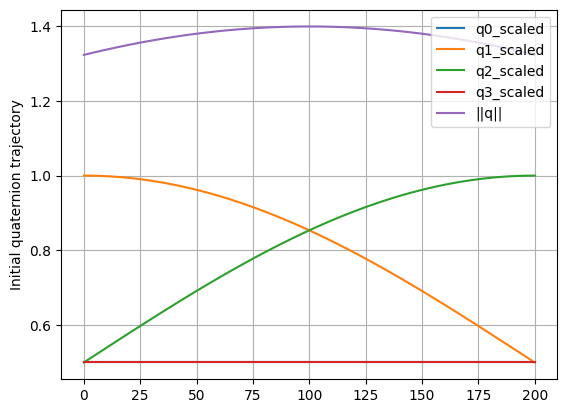

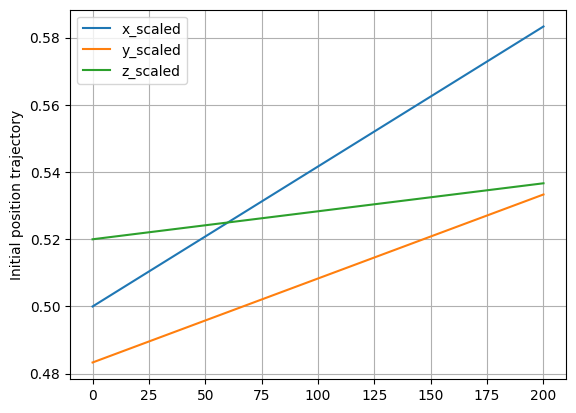

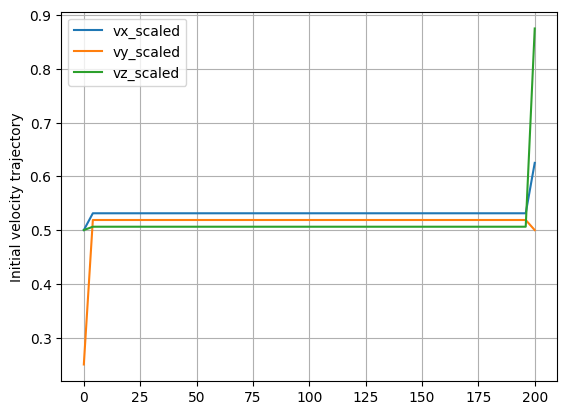

In [232]:
# Plot (scaled initial trajectories)

u_value=np.copy(ou)
x_value=np.copy(ox)

plt.figure(1)
plt.plot(np.linspace(0, tf, T+1), x_value[6,:], label='q0_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[7,:], label='q1_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[8,:], label='q2_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[9,:], label='q3_scaled')
plt.plot(np.linspace(0, tf, T+1), np.linalg.norm(x_value[6:10,:],axis=0), label='||q||')
plt.ylabel('Initial quaternion trajectory')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(2)
plt.plot(np.linspace(0, tf, T+1), x_value[0,:], label='x_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[1,:], label='y_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[2,:], label='z_scaled')

plt.ylabel('Initial position trajectory')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

plt.figure(3)
plt.plot(np.linspace(0, tf, T+1), x_value[3,:], label='vx_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[4,:], label='vy_scaled')
plt.plot(np.linspace(0, tf, T+1), x_value[5,:], label='vz_scaled')

plt.ylabel('Initial velocity trajectory')
plt.gca().tick_params(labelsize=10)
plt.legend()
plt.grid(True)

In [ ]:
def f_rk4_step(xk, uk, dt,
               f_orig_opt_prob, x_states, u_input, dynamic_parameters,
               S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double):
    
    xk_no_scaled = SCVx_inv_scaling_x(xk,S_x_scaling_double,c_x_scaling_double)
    uk_no_scaled = SCVx_inv_scaling_u(uk,S_u_scaling_double,c_u_scaling_double)
    k1 = f_SCVx(xk_no_scaled, uk_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    k2 = f_SCVx(xk_no_scaled + 0.5 * dt * k1, uk_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    k3 = f_SCVx(xk_no_scaled + 0.5 * dt * k2, uk_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    k4 = f_SCVx(xk_no_scaled + dt * k3, uk_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    return xk + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

def f_rk5_step(xk, uk, dt,
               f_orig_opt_prob, x_states, u_input, dynamic_parameters,
               S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double):

    xk_no_scaled = SCVx_inv_scaling_x(xk,S_x_scaling_double,c_x_scaling_double)
    uk_no_scaled = SCVx_inv_scaling_u(uk,S_u_scaling_double,c_u_scaling_double)

    k1 = f_SCVx(xk_no_scaled, uk_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    k2 = f_SCVx(xk_no_scaled + (1/4) * dt * k1, uk_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    k3 = f_SCVx(xk_no_scaled + (3/8) * dt * k2, uk_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    k4 = f_SCVx(xk_no_scaled + (12/13) * dt * k3, uk_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    k5 = f_SCVx(xk_no_scaled + dt * k4, uk_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    k6 = f_SCVx(xk_no_scaled + (1/2) * dt * k5, uk_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)
    
    return xk + dt * (16/135 * k1 + 6656/12825 * k3 + 28561/56430 * k4 - 9/50 * k5 + 2/55 * k6)

def f_Euler_step(xk, uk, dt,
                 f_orig_opt_prob, x_states, u_input, dynamic_parameters,
                 S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double):

    xk_no_scaled = SCVx_inv_scaling_x(xk,S_x_scaling_double,c_x_scaling_double)
    uk_no_scaled = SCVx_inv_scaling_u(uk,S_u_scaling_double,c_u_scaling_double)

    return xk_no_scaled + dt * f_SCVx(xk_no_scaled, uk_no_scaled, f_orig_opt_prob, x_states, u_input, dynamic_parameters)

def J_SCVx(x,u,T,tau_double,
           f_orig_opt_prob, g_orig_opt_prob, x_states, u_input, dynamic_parameters,
           S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double):
    
    cost = 0
    for k in range(0, T): # from 0 to T-1
        cost += tau_double*np.linalg.norm(u[0:3,k], ord=2)**2
        cost += tau_double*np.linalg.norm(u[3:6,k], ord=2)**2

    for k in range(0, T): # from 0 to T-1

        flow_map = f_rk4_step(x[:, k:k+1], u[:, k:k+1], tau_double,
        f_orig_opt_prob, x_states, u_input, dynamic_parameters,
        S_x_scaling_double,c_x_scaling_double,S_u_scaling_double,c_u_scaling_double)

        SCVx_defect = SCVx_inv_scaling_x(x[:, k+1:k+2],S_x_scaling_double,c_x_scaling_double)-flow_map
        
        cost += tau_double*np.linalg.norm(lamb_double*SCVx_defect, ord=1)

    for k in range(0, T+1): # from 0 to T
        x_no_scaled = SCVx_inv_scaling_x(x[k:k+1],S_x_scaling_double,c_x_scaling_double)
        if k == T:
            u_no_scaled = SCVx_inv_scaling_u(u[T-1:T],S_u_scaling_double,c_u_scaling_double)
        else:
            u_no_scaled = SCVx_inv_scaling_u(u[k:k+1],S_u_scaling_double,c_u_scaling_double)
        subs_dict = {
        **dict(zip(x_states,x_no_scaled.flatten())),
        **dict(zip(u_input, u_no_scaled.flatten())),
        **dynamic_parameters
        }
            
        g_double =g_orig_opt_prob.subs(subs_dict)

        for i in range(0,np.size(g_orig_opt_prob)):
            cost += tau_double*np.abs(lamb_double*(np.max([g_double[i],0])))

    return cost

In [ ]:
ox_cvxpy.value=ox #trajectory initialization (scaled)
ou_cvxpy.value=ou #trajectory initialization (scaled)

tau.value = tau_double
sqrt_tau.value = (tau_double)**0.5

lamb.value = lamb_double
tau_lamb.value = tau_double*lamb_double
etta.value = etta_double

S_x_scaling.value = S_x_scaling_double
S_u_scaling.value = S_u_scaling_double

c_x_scaling.value = c_x_scaling_double
c_u_scaling.value = c_u_scaling_double

vel_max = vel_max_double
omega_max = omega_max_double
acc_max.value = acc_max_double
torq_max.value = torq_max_double

start_pos.value = start_pos_double
end_pos.value = end_pos_double

t0 = time.time()

i=1
no_first_iterations = False
while True:


    for k in range(0, T):
        aux_A_discrete[0:states_size,states_size*k:states_size*(k+1)] = A_discrete_scaled_SCVx(ox[0:states_size,k:k+1], ou[0:inputs_size,k:k+1],
                           f_orig_opt_prob, x_states, u_input, dynamic_parameters,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double,
                           size_N, tau_double)
        
        aux_B_discrete[0:states_size,inputs_size*k:inputs_size*(k+1)] = B_discrete_scaled_SCVx(ox[0:states_size,k:k+1], ou[0:inputs_size,k:k+1],
                           f_orig_opt_prob, x_states, u_input, dynamic_parameters,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double,
                           size_N, tau_double)
        
        aux_y_discrete[0:states_size,k:k+1] = y_discrete_scaled_SCVx(ox[0:states_size,k:k+1], ou[0:inputs_size,k:k+1],
                           f_orig_opt_prob, x_states, u_input, dynamic_parameters,
                           S_x_scaling_double, S_u_scaling_double, c_x_scaling_double, c_u_scaling_double,
                           size_N, tau_double)


    #print(aux_B_discrete_qw_scaled[0:7,3*10:3*10+3])
    #break;

    A_discrete.value = np.copy(aux_A_discrete)
    B_discrete.value = np.copy(aux_B_discrete)
    y_discrete.value = np.copy(aux_y_discrete)

    for k in range(0, T+1):
        aux_a_linear_obs1[0:3,k:k+1] = -(ox[3:6,k:k+1]-c_obs1_double)/(np.linalg.norm(ox[3:6,k:k+1]-c_obs1_double,2))
        aux_a_linear_obs2[0:3,k:k+1] = -(ox[3:6,k:k+1]-c_obs2_double)/(np.linalg.norm(ox[3:6,k:k+1]-c_obs2_double,2))
        aux_a_linear_obs3[0:3,k:k+1] = -(ox[3:6,k:k+1]-c_obs3_double)/(np.linalg.norm(ox[3:6,k:k+1]-c_obs3_double,2))

        aux_b_linear_obs1[0:1,k:k+1] = -np.linalg.norm(ox[3:6,k:k+1]-c_obs1_double,2)-aux_a_linear_obs1[:,k:k+1].T@ox[3:6,k:k+1]+d_obs1_double
        aux_b_linear_obs2[0:1,k:k+1] = -np.linalg.norm(ox[3:6,k:k+1]-c_obs2_double,2)-aux_a_linear_obs2[:,k:k+1].T@ox[3:6,k:k+1]+d_obs2_double
        aux_b_linear_obs3[0:1,k:k+1] = -np.linalg.norm(ox[3:6,k:k+1]-c_obs3_double,2)-aux_a_linear_obs3[:,k:k+1].T@ox[3:6,k:k+1]+d_obs3_double

    a_linear_obs1.value = np.copy(aux_a_linear_obs1)
    a_linear_obs2.value = np.copy(aux_a_linear_obs2)
    a_linear_obs3.value = np.copy(aux_a_linear_obs3)

    b_linear_obs1.value = np.copy(aux_b_linear_obs1)
    b_linear_obs2.value = np.copy(aux_b_linear_obs2)
    b_linear_obs3.value = np.copy(aux_b_linear_obs3)

    val=problem.solve(ignore_dpp=True) #IF YOU USE CVXPYGEN: ignore_dpp=False

    vc_opt=np.copy(vc.value)
    vb1_opt=np.copy(vb1.value)
    vb2_opt=np.copy(vb2.value)
    vb3_opt=np.copy(vb3.value)
    x_opt=np.copy(nx.value)
    u_opt=np.copy(u.value)

    for k in range(0, T): #scaling begin
        ou[0:3,k:k+1]=u_CW_scaling@ou[0:3,k:k+1]
        ou[3:6,k:k+1]=u_qw_scaling@ou[3:6,k:k+1]

    J_SCVx_opt=J_SCVx(x_opt,u_opt,T)
    oJ_SCVx=J_SCVx(ox,ou,T)
    L_SCVx_opt=L_SCVx(x_opt,u_opt,vc_opt,vb1_opt,vb2_opt,vb3_opt,T)


    Delta_J_SCVx=oJ_SCVx-J_SCVx_opt
    Delta_L_SCVx=J_SCVx_opt-L_SCVx_opt
    print("oJ_SCVx: ",oJ_SCVx,"J_SCVx_opt",J_SCVx_opt,"L_SCVx_opt",L_SCVx_opt,"cvxpy_L",val,"Norm_x_diff: ",np.max(np.linalg.norm((x_opt-ox), ord=2,axis=0)))

    if (Delta_L_SCVx<e_tol*np.abs(oJ_SCVx) or np.max(np.linalg.norm((x_opt-ox), ord=1,axis=0))<epsilon_stop_norm) and no_first_iterations:
      for k in range(0, T): #scaling end
          ou[0:3,k:k+1]=np.linalg.inv(u_CW_scaling)@ou[0:3,k:k+1]
          ou[3:6,k:k+1]=np.linalg.inv(u_qw_scaling)@ou[3:6,k:k+1]

      x_global=np.copy(ox)
      u_global=np.copy(ou)
      break;
    else:
      rho_i=Delta_J_SCVx/Delta_L_SCVx
      if rho_i<rho0:
        etta.value=max([etta0,etta.value/beta_sh])
        ox=np.copy(ox)
        ou=np.copy(ou)
      if rho_i>=rho0 and rho_i<rho1:
        etta.value=max([etta0,etta.value/beta_sh])
        ox=np.copy(x_opt)
        ou=np.copy(u_opt)
      if rho_i>=rho1 and rho_i<rho2:
        ox=np.copy(x_opt)
        ou=np.copy(u_opt)
      if rho_i>=rho2:
        etta.value=min([etta1,beta_gr*etta.value])
        ox=np.copy(x_opt)
        ou=np.copy(u_opt)

      print(" Iteration number: ",i," Cost function: ", val," Etta: ",etta.value, " Rho: ",rho_i)

    ox_cvxpy.value=np.copy(ox)
    ou_cvxpy.value=np.copy(ou)

    if i==3:
        no_first_iterations = True
    i=i+1
    
t1 = time.time()
print('\nCVXPY\nSolve time: %.3f ms' % (1000 * (t1 - t0)))